Tên: Nguyễn Thọ Anh Khoa

Facebook: Khoa Nguyễn KT

Lớp: AI Insight 

# Logistic Regression - Exercises

## 1) Đọc hiểu code (file ‘Logistic regression-petal-batch-sigmoid.ipynb’) về cách train bài toán logistic regression theo batch gradient descent.

Có 4 phần trong nhỏ tron đoạn code đầu tiên: load data, show distribution, add intercept, shuffle
- Load data: data gồm có 100 hàng và 3 cột, thứ tự mỗi cột từ trái sang phải là Petal_Length, Petal_Width, và Label, **np.genfromtxt** dùng để load data và chuyển sang numpy, **delimiter** dùng để chọn phân tách theo cột (vì format của csv nhận diện hàng là mỗi xuống dòng và cột là mỗi dấu ,) ,**skip_header** dùng để bỏ hàng đầu tiên (name của các cột). X là các feature được đưa vào, y là label 
- Show distribution: Vẽ sự phân bố của data theo label với trục x là Petal_Length, trục y là Petal_Width. Từ đó có thể thấy được dữ liệu khá sạch có sửa phân biệt rõ ràng giữa các samples thuộc label 0 và 1.
- Add intercept: vì $z= \mathbf{\theta_T x}$ mỗi hàng sẽ là hàm $y=wx +b$ vì cần + b nên phải thêm 1 vào matrix x.
- Shuffle: data phải được shuffle để  giúp cho model học được tính tổng quát của data, nếu không shuffle thì model có thể sẽ học vị trí của data thay vì feature của data và tránh trường hợp label được sắp xếp theo thứ tự khiên cho model học không tốt.

(100, 3)
(100,)


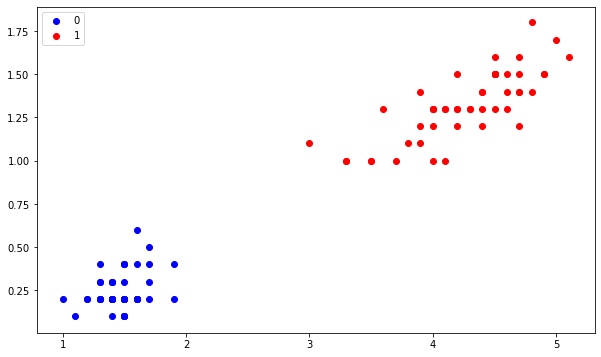

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load data
iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1)
X = iris[:, :2]
y = iris[:, 2]

# show distribution of data
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='b', label='0') #x,y,color, label
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='r', label='1')
plt.legend()

# add intercept
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
#shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)
X = X[inds]
y = y[inds]

print(X.shape)
print(y.shape)


Model được thực hiện training full batch, sau khi load dữ liệu các bước thực hiện để training như sau:
- Forward: sử dụng hàm predict để lấy kết quả phân loại (range từ 0-1 xác xuất của class đó) (công thức (2) trong hình)
- Compute mean loss: tính loss dựa trên label (công thứ (3) trong hình )
- Compute mean gradient: công thức (4) trong hình 
- Update weigth: công thức (5) trong hình 

đoạn code còn lại dùng để lưu trữ loss và accuracy cho mỗi epochs 

![function](imgs/full_batch.png)

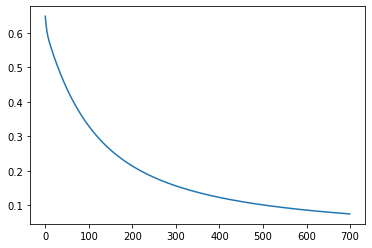

In [2]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]


def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / y.size


lr=0.1
num_iter=700

theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    # predict z
    y_hat = predict(X, theta)
    
    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)
    
    theta -= lr*gradient    
    #print('new theta: ', theta)

    # for debug
    if(i%1 == 0):
        # loss
        losses.append(loss)
        
        # accuracy for training
        preds = predict(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc)        

# show figures
plt.plot(losses)
plt.show()

## 2) Dựa vào file ‘Logistic regression-petal-batch-sigmoid.ipynb’, cài đặt lại theo 1- sample và m-sample.

### 1-sample

- Lấy từng sample: $x^{(i)}, y^{(i)}$
- Forward: $$ z^{(i)} = \pmb{\theta^Tx^{(i)}}$$
$$\hat{y}^{(i)}= \frac{1}{1+ e^{-z^{(i)}}}$$
- Loss: $$ L(\pmb{\theta}) = -y^{(i)} \log{\hat{y}^{(i)}} - (1-y^{(i)}) \log{(1 - \hat{y}^{(i)})} $$
- Gradient: $$L_{\pmb{\theta}} ^{'} = \pmb{x^{(i)}}(y^{(i)} - y^{(i)})$$
- Update Weight: $$\pmb{\theta = \theta} - \eta L_{\pmb{\theta}} ^{'}$$

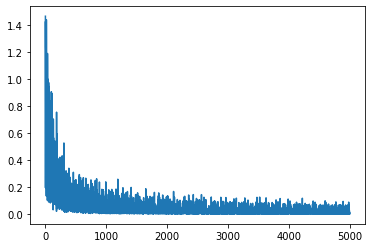

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#load data
iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1)
X = iris[:,:2] 
y = iris[:, 2]


#intercept
data_size = X.shape[0]
intercept = np.ones((data_size, 1)) # 1 column
X = np.concatenate([intercept, X], axis=1)

# initial weigth
w0, w1, b = 0.5, -0.5, 0.7
theta = np.array([b, w0, w1])
epochs = 50
eta = 0.1

def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict(x, theta):
    z = x.dot(theta)
    y_hat = sigmoid(z)
    return y_hat

losses = []
accs = []
inds = np.arange(data_size)
for i in range(epochs):
    # shuffle data
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    for j in range(data_size):
        #predict
        x = X[j]
        y_hat = predict(x, theta)
        #compute loss
        loss = -y[j]*np.log(y_hat) - (1-y[j])*np.log(1-y_hat)
        losses.append(loss)
        #gradient
        gradient = x*(y_hat-y[j])
        
        #update weight
        theta -= eta*gradient
        
        preds = predict(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc) 
        

plt.plot(losses)
plt.show()

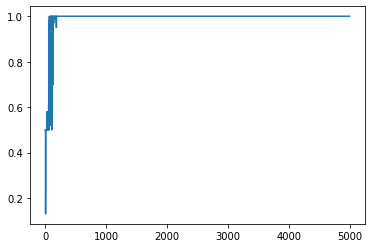

In [4]:
plt.plot(accs)
plt.show()

### m-sample

- Lấy từng m sample: $\pmb{X, y}$
- Forward: $$ \pmb{z = \theta^TX}$$
$$\pmb{\hat{y}}= \frac{1}{1+ e^{-\pmb{z}}}$$
- Loss: $$ L(\pmb{\theta}) = \frac{1}{m} (\pmb{-y}^T\log{\pmb{\hat{y}}} - (1-\pmb{y})^T\log{(1 - \pmb{\hat{y}}))} $$
- Gradient: $$L_{\pmb{\theta}} ^{'} = \frac{1}{m} \pmb{X^T(\hat{y} - y)}$$
- Update Weight: $$\pmb{\theta = \theta} - \eta L_{\pmb{\theta}} ^{'}$$

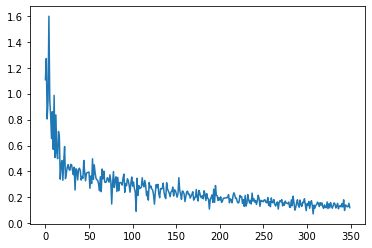

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#load data
iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1)
X = iris[:, :2]
y = iris[:, 2:]

data_size = X.shape[0]
intercept = np.ones((data_size, 1))

X = np.concatenate([intercept, X], axis=1)
inds = np.arange(data_size)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict(X, theta):
    return sigmoid(np.dot(X, theta.T))

def compute_loss(y_hat, y):
    return np.mean(-(y)*np.log(y_hat) - (1-y)*np.log(1-y_hat))

def gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat-y)).T/X.shape[0]

epochs = 50
eta = 0.1
b, w0, w1 = 0.5, 1.0, 2.0
theta = np.array([[b, w0, w1]])

m = 16
losses = []
accs = []
for i in range(epochs):
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    for j in range(0, data_size, m):
        x = X[j:min(j+m, data_size), :]
        l_y = y[j:min(j+m, data_size), :]
        y_hat = predict(x, theta)
        
        loss = compute_loss(y_hat, l_y)
        losses.append(loss)
        
        grad = gradient(x, y_hat, l_y)
        
        theta -= eta*grad
        
        preds = predict(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc)  
        
plt.plot(losses)
plt.show()

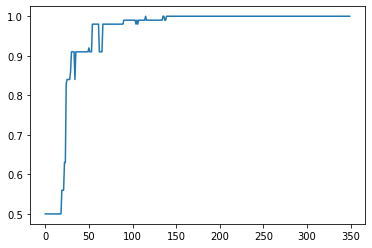

In [6]:
plt.plot(accs)
plt.show()

## 3) Dựa vào file ‘Logistic regression-petal-batch-sigmoid.ipynb’, cài đặt lại bài toán phân loại nhị phân dùng hàm tanh.


- Lấy từng m sample: $\pmb{X, y}$
- Forward: $$ \pmb{z = \theta^TX}$$
$$\pmb{\hat{y}}= \frac{e^{\pmb{z}} - e^{\pmb{-z}}}{e^{\pmb{z}} + e^{\pmb{-z}}}$$
- Loss: $$ L(\pmb{\theta}) = \frac{1}{m} (\pmb{-y}^T\log{\pmb{\hat{y}}} - (1-\pmb{y})^T\log{(1 - \pmb{\hat{y}}))} $$
- Gradient: $$L_{\pmb{\theta}} ^{'} = \frac{1}{m} \pmb{X^T} \frac{(\pmb{\hat{y}} - \pmb{y})(1 + \pmb{\hat{y}})}{\pmb{\hat{y}} }$$
- Update Weight: $$\pmb{\theta = \theta} - \eta L_{\pmb{\theta}} ^{'}$$

**NOTE: Vì range của hàm tanh là (-1,1) hàm log không thể nhận giá trị âm cần shift lên 1 và chia 2 để  có range (0,1)**

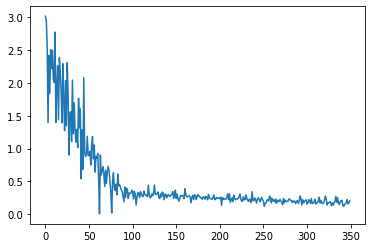

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#load data
iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1)
X = iris[:, :2]
y = iris[:, 2:]

data_size = X.shape[0]
intercept = np.ones((data_size, 1))

X = np.concatenate([intercept, X], axis=1)
inds = np.arange(data_size)

def sigmoid(z):
    return 1/(1+np.exp(-z))
def tanh_fnc(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
def predict(X, theta):
    return (tanh_fnc(np.dot(X, theta.T)) + 1.0)/2

def compute_loss(y_hat, y):
    return np.mean(-(y)*np.log(y_hat) - (1-y)*np.log(1-y_hat))

def gradient(X, y_hat, y):
#     print(((y_hat-y)*(1+y_hat)/(y_hat)).shape)
    return np.dot(X.T, (y_hat-y)*(1+y_hat)/(y_hat)).T/X.shape[0]

epochs = 50
eta = 0.01
b, w0, w1 = 0.5, 1.0, 2.0
theta = np.array([[b, w0, w1]])

m = 16
losses = []
accs = []
for i in range(epochs):
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    for j in range(0, data_size, m):
        x = X[j:min(j+m, data_size), :]
        l_y = y[j:min(j+m, data_size), :]
        y_hat = predict(x, theta)
        
        loss = compute_loss(y_hat, l_y)
        losses.append(loss)
        grad = gradient(x, y_hat, l_y)
        
        theta -= eta*grad
        
        preds = predict(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc)
    
        
plt.plot(losses)
plt.show()

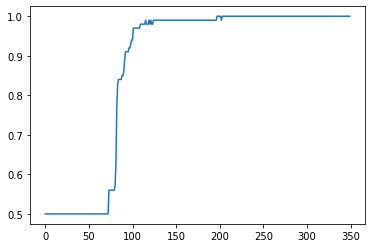

In [8]:
plt.plot(accs)
plt.show()

## 4) Dựa vào file ‘Logistic regression-petal-batch-sigmoid.ipynb’, cài đặt lại bài toán phân loại nhị phân dùng MSE (L2 loss).


- Lấy từng m sample: $\pmb{X, y}$
- Forward: $$ \pmb{z = \theta^TX}$$
$$\pmb{\hat{y}}= \frac{e^{\pmb{z}} - e^{\pmb{-z}}}{e^{\pmb{z}} + e^{\pmb{-z}}}$$
- Loss: $$ L(\pmb{\theta}) = (\pmb{\hat{y} -y })^2 $$
- Gradient: $$L_{\pmb{\theta}} ^{'} = \frac{1}{m} 2\pmb{X^T}(\pmb{\hat{y}-y})(\pmb{\hat{y}-\hat{y}^2}) $$
- Update Weight: $$\pmb{\theta = \theta} - \eta L_{\pmb{\theta}} ^{'}$$

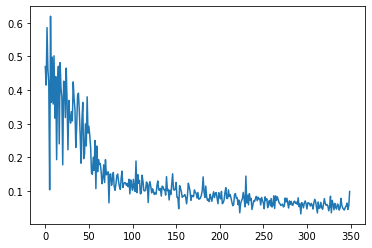

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#load data
iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1)
X = iris[:, :2]
y = iris[:, 2:]

data_size = X.shape[0]
intercept = np.ones((data_size, 1))

X = np.concatenate([intercept, X], axis=1)
inds = np.arange(data_size)

def sigmoid(z):
    return 1/(1+np.exp(-z))
    
def predict(X, theta):
    return sigmoid(np.dot(X, theta.T))

# def compute_loss(y_hat, y):
#     return np.mean(-(y)*np.log(y_hat) - (1-y)*np.log(1-y_hat))
def compute_loss(y_hat, y):
    return np.sum((y_hat-y)**2)/y_hat.shape[0]
    
# def gradient(X, y_hat, y):
#     return np.dot(X.T, (y_hat-y)).T/X.shape[0]
def gradient(X, y_hat, y):
    return 2*np.dot(X.T, (y_hat-y)*(y_hat-y_hat**2)).T/X.shape[0]

epochs = 50
eta = 0.1
b, w0, w1 = 0.5, 1.0, 2.0
theta = np.array([[b, w0, w1]])

m = 16
losses = []
accs = []
for i in range(epochs):
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    for j in range(0, data_size, m):
        x = X[j:min(j+m, data_size), :]
        l_y = y[j:min(j+m, data_size), :]
        y_hat = predict(x, theta)
        
        loss = compute_loss(y_hat, l_y)
        losses.append(loss)
        
        grad = gradient(x, y_hat, l_y)
        
        theta -= eta*grad
        
        preds = predict(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc)

plt.plot(losses)
plt.show()

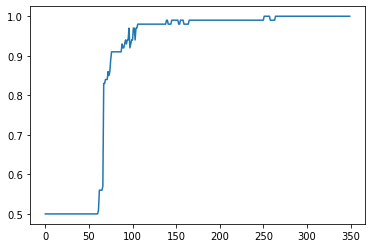

In [10]:
plt.plot(accs)
plt.show()

## 5) Cài đặt bài toán phân loại nhị phân cho data iris (iris_full.csv) có 4 feature.

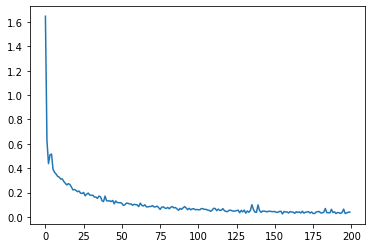

In [13]:
import numpy as np
import matplotlib.pyplot as plt

iris_full = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1)
X = iris_full[:, :4]
y = iris_full[:, 4:]

data_size = X.shape[0]
intercept = np.ones((data_size, 1))
X = np.concatenate([intercept, X], axis=1)

def sigmoid(z):
    return 1/(1+np.exp(-z))
def predict(X, theta):
    return sigmoid(np.dot(X, theta.T))
def compute_loss(y_hat, y):
    return np.mean(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))
def gradient(X, y_hat, y):
    return np.dot(X.T,(y_hat-y)).T/y_hat.shape[0]

epochs = 50
eta = 0.1
b, w0, w1, w2, w3 = 0.1, 0.2, 0.3, 0.4, 0.5
theta = np.array([[b, w0, w1, w2, w3]])
m=32

losses = []
accs = []
inds = np.arange(data_size)
for i in range(epochs):
    np.random.shuffle(inds)
    X=X[inds]
    y=y[inds]
    for j in range(0, data_size, m):
        x = X[j:min(m+j, data_size), :]
        l_y = y[j:min(m+j, data_size), :]
        y_hat= predict(x, theta)
        loss = compute_loss(y_hat, l_y)
        grad = gradient(x, y_hat, l_y)
        theta -= eta*grad
        losses.append(loss)
        
        preds = predict(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc)
        
plt.plot(losses)
plt.show()
        

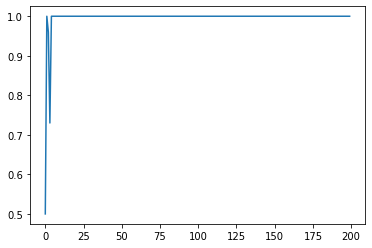

In [14]:
plt.plot(accs)
plt.show()